In [1]:
from astropy.io import fits
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

load_z0DSage = fits.open('tao.1951.0.fits')
load_z1DSage = fits.open('tao.1959.0.fits')
load_z2DSage= fits.open('tao.1961.0.fits')
load_z3DSage = fits.open('tao.1957.0.fits')

data_z0DSage = load_z0DSage[1].data
data_z1DSage = load_z1DSage[1].data
data_z2DSage = load_z2DSage[1].data
data_z3DSage = load_z3DSage[1].data

In [2]:
# Dividing sample between centrals and satellites for DARK SAGE
idx_cen_z0DSage = np.where(data_z0DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z0DSage  = np.where(data_z0DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z0DSage = data_z0DSage[idx_cen_z0DSage]
gal_sat_z0DSage = data_z0DSage[idx_sat_z0DSage]

idx_cen_z1DSage = np.where(data_z1DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z1DSage  = np.where(data_z1DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z1DSage = data_z1DSage[idx_cen_z1DSage]
gal_sat_z1DSage = data_z1DSage[idx_sat_z1DSage]

idx_cen_z2DSage = np.where(data_z2DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z2DSage  = np.where(data_z2DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z2DSage = data_z2DSage[idx_cen_z2DSage]
gal_sat_z2DSage = data_z2DSage[idx_sat_z2DSage]

idx_cen_z3DSage = np.where(data_z3DSage[:]['Galaxy_Classification'] == 0) [0]
idx_sat_z3DSage  = np.where(data_z3DSage[:]['Galaxy_Classification'] == 1) [0]
gal_cen_z3DSage = data_z3DSage[idx_cen_z3DSage]
gal_sat_z3DSage = data_z3DSage[idx_sat_z3DSage]


KeyboardInterrupt: 

In [ ]:
#### Taking all galaxies with TSM = 0 out of sample
TSM_idx_cen_z0DSage = np.where(gal_cen_z0DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z0DSage = gal_cen_z0DSage[TSM_idx_cen_z0DSage]

TSM_idx_cen_z1DSage = np.where(gal_cen_z1DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z1DSage = gal_cen_z1DSage[TSM_idx_cen_z1DSage]

TSM_idx_cen_z2DSage = np.where(gal_cen_z2DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z2DSage = gal_cen_z2DSage[TSM_idx_cen_z2DSage]

TSM_idx_cen_z3DSage = np.where(gal_cen_z3DSage[:]['Total_Stellar_Mass']!=0)[0]
gal_cen_z3DSage = gal_cen_z3DSage[TSM_idx_cen_z3DSage]


#### Taking all galaxies with DSM = 0 out of sample
DSM_idx_cen_z0DSage = np.where(gal_cen_z0DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z0DSage = gal_cen_z0DSage[DSM_idx_cen_z0DSage]

DSM_idx_cen_z1DSage = np.where(gal_cen_z1DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z1DSage = gal_cen_z1DSage[DSM_idx_cen_z1DSage]

DSM_idx_cen_z2DSage = np.where(gal_cen_z2DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z2DSage = gal_cen_z2DSage[DSM_idx_cen_z2DSage]

DSM_idx_cen_z3DSage = np.where(gal_cen_z3DSage[:]['Disk_Stellar_Mass']!=0)[0]
gal_cen_z3DSage = gal_cen_z3DSage[DSM_idx_cen_z3DSage]



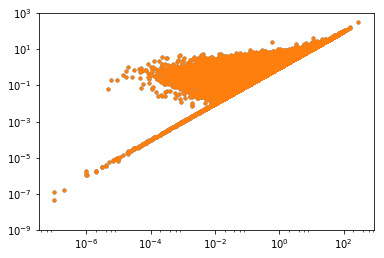

In [4]:
Total_Bulge_Mass = gal_cen_z0DSage['Merger-driven_Bulge_Mass'] + gal_cen_z0DSage['Instability-driven_Bulge_Mass']
w= gal_cen_z0DSage['Total_Stellar_Mass'] - gal_cen_z0DSage['Disk_Stellar_Mass'] - gal_cen_z0DSage['Pseudobulge_Mass']


plt.semilogx(w, Total_Bulge_Mass, '.')
plt.semilogy(w, Total_Bulge_Mass, '.')
plt.show()


In [5]:
allgal_cen_DSage = [gal_cen_z0DSage, gal_cen_z1DSage, gal_cen_z2DSage, gal_cen_z3DSage]
gal_cen_DSage = {}
i=0

for i in range(len(allgal_cen_DSage)):
    gal_cen_DSage["gal_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] >= 1e7, 
                                                                                     1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] <= 1e8))[0]
    
    gal_cen_DSage["gal_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] > 1e8, 
                                                                                     1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] <= 1e9))[0]
    
    gal_cen_DSage["gal_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] > 1e9, 
                                                                                     1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] <= 1e10))[0]
    
    gal_cen_DSage["gal_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] > 1e10, 
                                                                                     1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] <= 1e11))[0] 
   
    gal_cen_DSage["gal_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] > 1e11, 
                                                                                     1e10*allgal_cen_DSage[i]['Total_Stellar_Mass'] <= 1e12))[0]
    

    gal_cen_DSage["gal_z{0}_SM7_8".format(i)] = allgal_cen_DSage[i][gal_cen_DSage["gal_idx_z{0}_SM7_8".format(i)]]
    gal_cen_DSage["gal_z{0}_SM8_9".format(i)] = allgal_cen_DSage[i][gal_cen_DSage["gal_idx_z{0}_SM8_9".format(i)]]
    gal_cen_DSage["gal_z{0}_SM9_10".format(i)] = allgal_cen_DSage[i][gal_cen_DSage["gal_idx_z{0}_SM9_10".format(i)]]
    gal_cen_DSage["gal_z{0}_SM10_11".format(i)] = allgal_cen_DSage[i][gal_cen_DSage["gal_idx_z{0}_SM10_11".format(i)]] 
    gal_cen_DSage["gal_z{0}_SM11_12".format(i)] = allgal_cen_DSage[i][gal_cen_DSage["gal_idx_z{0}_SM11_12".format(i)]]


In [6]:
#gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Merger-driven_Bulge_Mass'] + gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Instability-driven_Bulge_Mass'])/gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
                
i=0
j=0
for i in range(len(allgal_cen_DSage)):
    for j in range(5):
        j = j + 7
        gal_cen_DSage["morph_z{0}_SM{1}_{2}".format(i,j,j+1)] =  gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']/gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']          
        gal_cen_DSage["xhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        gal_cen_DSage["yhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        gal_cen_DSage["zhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_DSage['gal_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      

        gal_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(gal_cen_DSage['xhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    gal_cen_DSage['yhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    gal_cen_DSage['zhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2) 
    


        gal_cen_DSage["gal_hlambda_z{0}_SM{1}_{2}".format(i,j,j+1)] = gal_cen_DSage['haloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]/(np.sqrt(2)*
                                                                                                                             gal_cen_DSage["gal_z{0}_SM{1}_{2}".format(i,j,j+1)]['Vvir']*
                                                                                                                             gal_cen_DSage["gal_z{0}_SM{1}_{2}".format(i,j,j+1)]['Rvir'])


In [7]:
 #Total_Bulge_Mass = gal_cen_z0DSage['Merger-driven_Bulge_Mass'] + gal_cen_z0DSage['Instability-driven_Bulge_Mass']
#(gal_cen_z0DSage['Merger-driven_Bulge_Mass'] + gal_cen_z0DSage['Instability-driven_Bulge_Mass'])     #for total bulge mass
# this is for disk  gal_cen_z1DSage['Disk_Stellar_Mass']

morph_cen_z0DSage = gal_cen_z0DSage['Disk_Stellar_Mass']/gal_cen_z0DSage['Total_Stellar_Mass']
morph_cen_z1DSage = gal_cen_z1DSage['Disk_Stellar_Mass']/gal_cen_z1DSage['Total_Stellar_Mass']
morph_cen_z2DSage = gal_cen_z2DSage['Disk_Stellar_Mass']/gal_cen_z2DSage['Total_Stellar_Mass']
morph_cen_z3DSage = gal_cen_z3DSage['Disk_Stellar_Mass']/gal_cen_z3DSage['Total_Stellar_Mass']

###### Redshift 0
bulgedom_idx_cen_z0DSage = np.where(morph_cen_z0DSage < 0.5)[0]
bulgedom_cen_z0DSage = gal_cen_z0DSage[bulgedom_idx_cen_z0DSage]

diskdom_idx_cen_z0DSage = np.where(morph_cen_z0DSage > 0.5)[0]
diskdom_cen_z0DSage = gal_cen_z0DSage[diskdom_idx_cen_z0DSage]

###### Redshift 1
bulgedom_idx_cen_z1DSage = np.where(morph_cen_z1DSage < 0.5)[0]
bulgedom_cen_z1DSage = gal_cen_z1DSage[bulgedom_idx_cen_z1DSage]

diskdom_idx_cen_z1DSage = np.where(morph_cen_z1DSage > 0.5)[0]
diskdom_cen_z1DSage = gal_cen_z1DSage[diskdom_idx_cen_z1DSage]

###### Redshift 2
bulgedom_idx_cen_z2DSage = np.where(morph_cen_z2DSage < 0.5)[0]
bulgedom_cen_z2DSage = gal_cen_z2DSage[bulgedom_idx_cen_z2DSage]

diskdom_idx_cen_z2DSage = np.where(morph_cen_z2DSage > 0.5)[0]
diskdom_cen_z2DSage = gal_cen_z2DSage[diskdom_idx_cen_z2DSage]

###### Redshift 3
bulgedom_idx_cen_z3DSage = np.where(morph_cen_z3DSage < 0.5)[0]
bulgedom_cen_z3DSage = gal_cen_z3DSage[bulgedom_idx_cen_z3DSage]

diskdom_idx_cen_z3DSage = np.where(morph_cen_z3DSage > 0.5)[0]
diskdom_cen_z3DSage = gal_cen_z3DSage[diskdom_idx_cen_z3DSage]

In [8]:
bulgedom_cen_DSage = {}
bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i=0
for i in range(len(bulge_gal_cen_DSage)):
    
    bulgedom_cen_DSage["Mvir_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Mvir']
    bulgedom_cen_DSage["TSM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Total_Stellar_Mass']    
    bulgedom_cen_DSage["CGMvir_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Central_Galaxy_Mvir']
    bulgedom_cen_DSage["bulgepseudo_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Pseudobulge_Mass']
    bulgedom_cen_DSage["DSM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Disk_Stellar_Mass']
    bulgedom_cen_DSage["ColdGM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Cold_Gas_Mass']    
    bulgedom_cen_DSage["HotGM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Hot_Gas_Mass']
    bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] = 1e10*bulge_gal_cen_DSage[i]['Ejected_Gas_Mass']     
    bulgedom_cen_DSage["Vvir_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Vvir']
    bulgedom_cen_DSage["Rvir_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Rvir']    
    bulgedom_cen_DSage["xpos_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X']
    bulgedom_cen_DSage["ypos_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y']
    bulgedom_cen_DSage["zpos_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z']
    bulgedom_cen_DSage["xvel_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X_Velocity']
    bulgedom_cen_DSage["yvel_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y_Velocity']
    bulgedom_cen_DSage["zvel_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z_Velocity']
    bulgedom_cen_DSage["xSDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X_Spin_of_Stellar_Disk']
    bulgedom_cen_DSage["ySDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y_Spin_of_Stellar_Disk']
    bulgedom_cen_DSage["zSDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z_Spin_of_Stellar_Disk']
    bulgedom_cen_DSage["xGDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['X_Spin_of_Gas_Disk']
    bulgedom_cen_DSage["yGDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Y_Spin_of_Gas_Disk']
    bulgedom_cen_DSage["zGDspin_z{0}".format(i)] = bulge_gal_cen_DSage[i]['Z_Spin_of_Gas_Disk']
    bulgedom_cen_DSage["xhaloJ_z{0}".format(i)] = bulge_gal_cen_DSage[i]['jX_Halo']
    bulgedom_cen_DSage["yhaloJ_z{0}".format(i)] = bulge_gal_cen_DSage[i]['jY_Halo']
    bulgedom_cen_DSage["zhaloJ_z{0}".format(i)] = bulge_gal_cen_DSage[i]['jZ_Halo']      
    
    bulgedom_cen_DSage["JSD_z{0}".format(i)] = bulge_gal_cen_DSage[i]['j_Stellar_Disk']
    
    bulgedom_cen_DSage["pos_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}'.format(i)]**2)
    
    bulgedom_cen_DSage["vel_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}'.format(i)]**2)
    
    bulgedom_cen_DSage["SDspin_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}'.format(i)]**2)
    
    bulgedom_cen_DSage["GDspin_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}'.format(i)]**2)
    
    
    bulgedom_cen_DSage["haloJ_z{0}".format(i)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}'.format(i)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}'.format(i)]**2) 
    

In [9]:
diskdom_cen_DSage = {}
ii=0
disk_gal_cen_DSage = [diskdom_cen_z0DSage, diskdom_cen_z1DSage, diskdom_cen_z2DSage, diskdom_cen_z3DSage]
for ii in range(len(disk_gal_cen_DSage)):
    diskdom_cen_DSage["Mvir_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Mvir']
    diskdom_cen_DSage["TSM_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Total_Stellar_Mass']
    diskdom_cen_DSage["CGMvir_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Central_Galaxy_Mvir']
    diskdom_cen_DSage["bulgepseudo_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Pseudobulge_Mass']
    diskdom_cen_DSage["DSM_z{0}".format(ii)] = 1e10*disk_gal_cen_DSage[ii]['Disk_Stellar_Mass'] 
    diskdom_cen_DSage["ColdGM_z{0}".format(i)] = 1e10*disk_gal_cen_DSage[i]['Cold_Gas_Mass']    
    diskdom_cen_DSage["HotGM_z{0}".format(i)] = 1e10*disk_gal_cen_DSage[i]['Hot_Gas_Mass']
    diskdom_cen_DSage["EjectedGM_z{0}".format(i)] = 1e10*disk_gal_cen_DSage[i]['Ejected_Gas_Mass']       
    diskdom_cen_DSage["Vvir_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Vvir']
    diskdom_cen_DSage["Rvir_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Rvir']    
    diskdom_cen_DSage["xpos_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X']
    diskdom_cen_DSage["ypos_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y']
    diskdom_cen_DSage["zpos_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z']
    diskdom_cen_DSage["xvel_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X_Velocity']
    diskdom_cen_DSage["yvel_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y_Velocity']
    diskdom_cen_DSage["zvel_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z_Velocity']
    diskdom_cen_DSage["xSDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X_Spin_of_Stellar_Disk']
    diskdom_cen_DSage["ySDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y_Spin_of_Stellar_Disk']
    diskdom_cen_DSage["zSDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z_Spin_of_Stellar_Disk']
    diskdom_cen_DSage["xGDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['X_Spin_of_Gas_Disk']
    diskdom_cen_DSage["yGDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Y_Spin_of_Gas_Disk']
    diskdom_cen_DSage["zGDspin_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['Z_Spin_of_Gas_Disk']
    diskdom_cen_DSage["xhaloJ_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['jX_Halo']
    diskdom_cen_DSage["yhaloJ_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['jY_Halo']
    diskdom_cen_DSage["zhaloJ_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['jZ_Halo']  
    diskdom_cen_DSage["JSD_z{0}".format(ii)] = disk_gal_cen_DSage[ii]['j_Stellar_Disk']
    
    diskdom_cen_DSage["pos_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xpos_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['ypos_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zpos_z{0}'.format(ii)]**2)
    
    diskdom_cen_DSage["vel_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xvel_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['yvel_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zvel_z{0}'.format(ii)]**2)

    
    diskdom_cen_DSage["SDspin_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xSDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['ySDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zSDspin_z{0}'.format(ii)]**2)
    
    diskdom_cen_DSage["GDspin_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xGDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['yGDspin_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zGDspin_z{0}'.format(ii)]**2)
    
    
    diskdom_cen_DSage["haloJ_z{0}".format(ii)] = np.sqrt(diskdom_cen_DSage['xhaloJ_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['yhaloJ_z{0}'.format(ii)]**2 + 
                                                    diskdom_cen_DSage['zhaloJ_z{0}'.format(ii)]**2)     

In [10]:
print bulgedom_cen_DSage['EjectedGM_z0']

[        0.         0.         0. ...,  37080200.         0.         0.]


In [11]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 100
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 1000
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n=0
m=0 

def normalizing(a):
    
    Ntotal_cen = float(len(a))
    hist_arg1_cen = np.histogram(a, bins_cen)
    hist_cen = hist_arg1_cen[0]/(binwidth_cen*Ntotal_cen)   #to have the same probability for different width sizes, divide by delta d which is your width length 
    return hist_cen


bulgenorm_cen_DSage = {}
for n in range(len(bulge_gal_cen_DSage)):
    bulgenorm_cen_DSage['hist_z{0}'.format(n)] = normalizing(bulgedom_cen_DSage['JSD_z{0}'.format(n)])

      
disknorm_cen_DSage = {}
for m in range(len(disk_gal_cen_DSage)):
    disknorm_cen_DSage['hist_z{0}'.format(m)] = normalizing(diskdom_cen_DSage['JSD_z{0}'.format(m)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


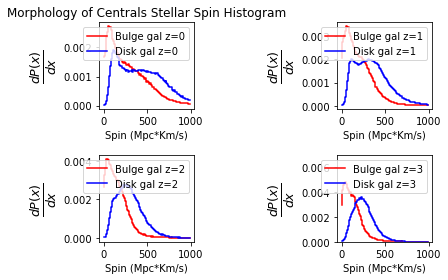

In [12]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z0'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_DSage['hist_z0'], color='b', label='Disk gal z=0')
#plt.xlim(0, 4)
#plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
plt.title('Morphology of Centrals Stellar Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z1'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_DSage['hist_z1'], color='b', label='Disk gal z=1')
#plt.xlim(0, 4)
#plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z2'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_DSage['hist_z2'], color='b', label='Disk gal z=2')
#plt.xlim(0, 4)
#plt.ylim(0, 1)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z3'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_DSage['hist_z3'], color='b', label='Disk gal z=3')
#plt.xlim(0, 4)
plt.ylim(0, 0.007)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_SAGE_z0toz3.png')

plt.show()

# Binning Stellar Mass

In [13]:
##################################### BULGE MASS #################################
bulgemassbin_cen_DSage = {}
i=0
    
for i in range(len(bulge_gal_cen_DSage)):
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] >= 1e7, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e8))[0]
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e8, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e9))[0]
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e9, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e10))[0]
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e10, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e11))[0] 
   
    bulgemassbin_cen_DSage["bulge_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["TSM_z{0}".format(i)] > 1e11, 
                                                                                     bulgedom_cen_DSage["TSM_z{0}".format(i)] <= 1e12))[0]

    
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM7_8".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM7_8".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM8_9".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM8_9".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM9_10".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM9_10".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM10_11".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM10_11".format(i)]]  
    bulgemassbin_cen_DSage["bulgedom_z{0}_SM11_12".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_SM11_12".format(i)]]


In [14]:
################################################ DISK MASS ####################################################
diskmassbin_cen_DSage = {}
i=0
    
for i in range(len(disk_gal_cen_DSage)):
    diskmassbin_cen_DSage["disk_idx_z{0}_SM7_8".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] >= 1e7, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e8))[0]
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM8_9".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e8, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e9))[0]
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM9_10".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e9, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e10))[0]
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM10_11".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e10, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e11))[0]
                                                                                   
    
    diskmassbin_cen_DSage["disk_idx_z{0}_SM11_12".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["TSM_z{0}".format(i)] > 1e11, 
                                                                                     diskdom_cen_DSage["TSM_z{0}".format(i)] <= 1e12))[0]

    
    diskmassbin_cen_DSage["diskdom_z{0}_SM7_8".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM7_8".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_SM8_9".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM8_9".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_SM9_10".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM9_10".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_SM10_11".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM10_11".format(i)]] 
    diskmassbin_cen_DSage["diskdom_z{0}_SM11_12".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_SM11_12".format(i)]]





In [15]:
#bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(5):
        j = j+ 7
        bulgedom_cen_DSage["Mvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_DSage["TSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_DSage["CGMvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_DSage["bulgepseudo_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        bulgedom_cen_DSage["DSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']            
        bulgedom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_DSage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_DSage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_DSage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_DSage["xvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_DSage["yvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_DSage["zvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_DSage["xSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["ySDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["zSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["xGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["yGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["zGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["xhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        bulgedom_cen_DSage["yhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        bulgedom_cen_DSage["zhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      

        bulgedom_cen_DSage["totparicles_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Particles']
    
        bulgedom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        bulgedom_cen_DSage["pos_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["vel_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["SDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["GDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2) 
    


In [16]:
#disk_gal_cen_DSage = [diskdom_cen_z0DSage, diskdom_cen_z1DSage, diskdom_cen_z2DSage, diskdom_cen_z3DSage]
i=0
j=0
for i in range(len(disk_gal_cen_DSage)):
    for j in range(5):
        j = j + 7
        diskdom_cen_DSage["Mvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Mvir']
        diskdom_cen_DSage["TSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        diskdom_cen_DSage["CGMvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        diskdom_cen_DSage["bulgepseudo_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        diskdom_cen_DSage["DSM_z{0}_SM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']                    
        diskdom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Vvir']
        diskdom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Rvir']            
        diskdom_cen_DSage["xpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X']
        diskdom_cen_DSage["ypos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y']
        diskdom_cen_DSage["zpos_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z']
        diskdom_cen_DSage["xvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        diskdom_cen_DSage["yvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        diskdom_cen_DSage["zvel_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        diskdom_cen_DSage["xSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["ySDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["zSDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["xGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        diskdom_cen_DSage["yGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        diskdom_cen_DSage["zGDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        diskdom_cen_DSage["xhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        diskdom_cen_DSage["yhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        diskdom_cen_DSage["zhaloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
    
        diskdom_cen_DSage["totparicles_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['Total_Particles']    
        diskdom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_SM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        
        diskdom_cen_DSage["pos_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['ypos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zpos_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["vel_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zvel_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["SDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['ySDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zSDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["GDspin_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zGDspin_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zhaloJ_z{0}_SM{1}_{2}'.format(i,j,j+1)]**2) 
    

    
    

In [79]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 40
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 4.0
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1=0
n2=0
m1=0
m2=0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        bulgenorm_cen_DSage['hist_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['haloJ_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(5):
        m2 = m2 + 7
        disknorm_cen_DSage['hist_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_DSage['haloJ_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


/fs1/porrasaj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


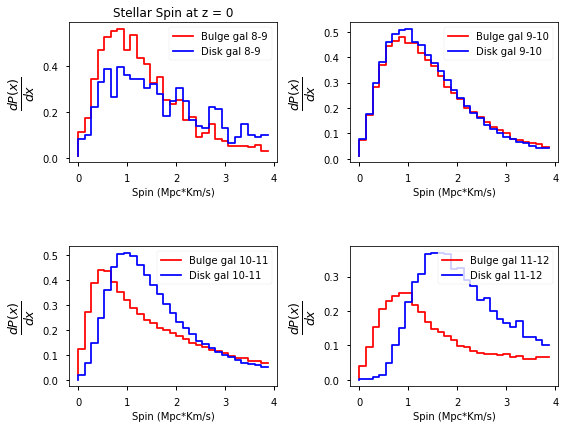

In [18]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z0_SM8_9'], color='r', label='Bulge gal 8-9')
plt.step(bins_cen, disknorm_cen_DSage['hist_z0_SM8_9'], color='b', label='Disk gal 8-9')
#plt.xlim(0, 1000)
#plt.ylim(0, 0.007)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
plt.title('Stellar Spin at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
plt.step(bins_cen, disknorm_cen_DSage['hist_z0_SM9_10'], color='b', label='Disk gal 9-10')
#plt.xlim(0, 1000)
#plt.ylim(0, 0.007)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
plt.step(bins_cen, disknorm_cen_DSage['hist_z0_SM10_11'], color='b', label='Disk gal 10-11')
#plt.xlim(0, 1000)
#plt.ylim(0, 0.007)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hist_z0_SM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_DSage['hist_z0_SM11_12'], color='b', label='Disk gal 11-12')
#plt.xlim(0, 1000)
#plt.ylim(0, 0.007)
plt.xlabel('Spin (Mpc*Km/s)', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
#plt.savefig('morph_Centrals_Massbinning_HaloSpin_histonorm_SAGE_z0.png')

plt.show()

# Calculating lambda spin

# Stellar lambda

In [19]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(5):
        j = j + 7        
        bulgedom_cen_DSage["slambda_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        diskdom_cen_DSage["slambda_z{0}_SM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_DSage["JSD_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)])

   

In [116]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 40
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = -1.0
dmax = 50 
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        bulgenorm_cen_DSage['slambdahist_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(5):
        m2 = m2 + 7
        disknorm_cen_DSage['slambdahist_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


/fs1/porrasaj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


In [122]:
a = np.where(bulgedom_cen_DSage['slambda_z0_SM10_11'] > 30)
print len(max(a))

3097


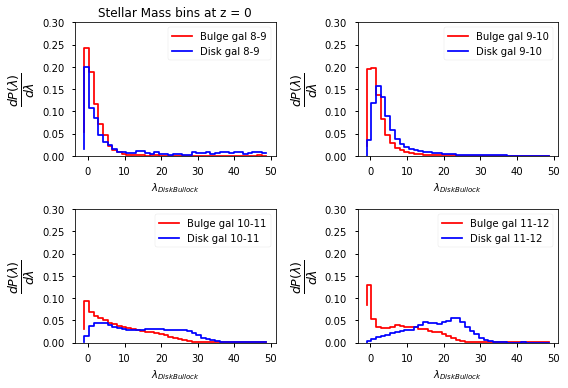

In [21]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_SM8_9'], color='r', label='Bulge gal 8-9')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_SM8_9'], color='b', label='Disk gal 8-9')
#plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_SM9_10'], color='b', label='Disk gal 9-10')
#plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_SM10_11'], color='b', label='Disk gal 10-11')
#plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_SM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_SM11_12'], color='b', label='Disk gal 11-12')
#plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_Massbinning_stellarSpin_histonorm_DSAGE_z0.png', dpi=100)

plt.show()

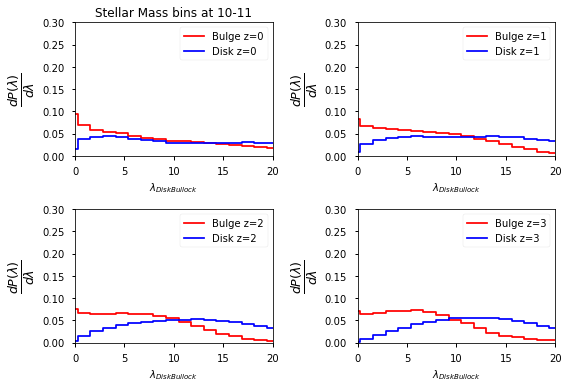

In [22]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_SM10_11'], color='r', label='Bulge z=0')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_SM10_11'], color='b', label='Disk z=0')
#plt.xticks([0, 0.05, 0.1, 0.15])
plt.xlim(0, 20)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at 10-11')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen,  bulgenorm_cen_DSage['slambdahist_z1_SM10_11'], color='r', label='Bulge z=1')
plt.step(bins_cen,  disknorm_cen_DSage['slambdahist_z1_SM10_11'], color='b', label='Disk z=1')
#plt.xticks([0, 0.05, 0.1, 0.15])
plt.xlim(0, 20)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_SM10_11'], color='r', label='Bulge z=2')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z2_SM10_11'], color='b', label='Disk z=2')
#plt.xticks([0, 0.05, 0.1, 0.15])
plt.xlim(0, 20)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_SM10_11'], color='r', label='Bulge z=3')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z3_SM10_11'], color='b', label='Disk z=3')
#plt.xticks([0, 0.05, 0.1, 0.15])
plt.xlim(0, 20)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_massbinning_stellarlambda_histonorm_DSAGE_SM10_11_z0toz3.png')

plt.show()

In [23]:
max(bulgedom_cen_DSage['Rvir_z0_SM10_11'])

1.20404

In [24]:
########DSAGE#########    make a function that does the binning mean and std of the mean
failval = np.nan
# failval = -999
mean_func = np.nanmean
std_func = np.nanstd
Mvir_bins = np.linspace(0.0, 1, 10)

def meanbin(a, b):
    idx_Mvir = np.digitize(a, Mvir_bins)
    mean_a = np.array([ mean_func(a[idx_Mvir==ii]) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    mean_b = np.array([ mean_func(b[idx_Mvir==ii]) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    return mean_a, mean_b



def stdbin(a, b):
    idx_Mvir = np.digitize(a, Mvir_bins)
    std_a = np.array([ std_func(a[idx_Mvir==ii]) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    std_b = np.array([ std_func(b[idx_Mvir==ii]) if len(a[idx_Mvir==ii]) > 0 else failval for ii in range(1, len(Mvir_bins))])
    return std_a, std_b


In [25]:
n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        bulgedom_cen_DSage['slambda_Rvir_meanbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = meanbin(bulgedom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        bulgedom_cen_DSage['slambda_Rvir_stdbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = stdbin(bulgedom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        

        
    
for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(5):
        m2 = m2 + 7
        diskdom_cen_DSage['slambda_Rvir_meanbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = meanbin(diskdom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])
        diskdom_cen_DSage['slambda_Rvir_stdbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = stdbin(diskdom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['slambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


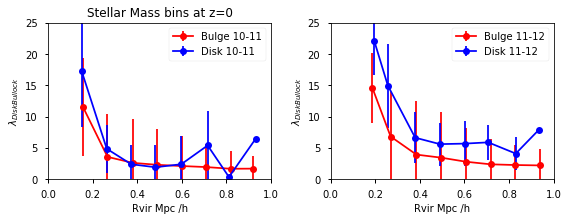

In [26]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.errorbar(bulgedom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][0],
             bulgedom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=bulgedom_cen_DSage['slambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='r', label='Bulge 10-11')

plt.errorbar(diskdom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][0],
             diskdom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=diskdom_cen_DSage['slambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='b', label='Disk 10-11')

plt.title('Stellar Mass bins at z=0')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Disk Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])

plt.subplot(222)
plt.errorbar(bulgedom_cen_DSage['slambda_Rvir_meanbin_z0_SM11_12'][0],
             bulgedom_cen_DSage['slambda_Rvir_meanbin_z0_SM11_12'][1],
            yerr=bulgedom_cen_DSage['slambda_Rvir_stdbin_z0_SM11_12'][1],
            marker='o', color='r', label='Bulge 11-12')

plt.errorbar(diskdom_cen_DSage['slambda_Rvir_meanbin_z0_SM11_12'][0],
             diskdom_cen_DSage['slambda_Rvir_meanbin_z0_SM11_12'][1],
            yerr=diskdom_cen_DSage['slambda_Rvir_stdbin_z0_SM11_12'][1],
            marker='o', color='b', label='Disk 11-12')


plt.xlim(0, 1)
plt.ylim(0, 25)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Disk Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')

plt.tight_layout()
#plt.savefig('morph_Centrals_stellarSpin_lambdavsRvir_SMbin10-12_DSAGE_z0.png', dpi=100)

plt.show()

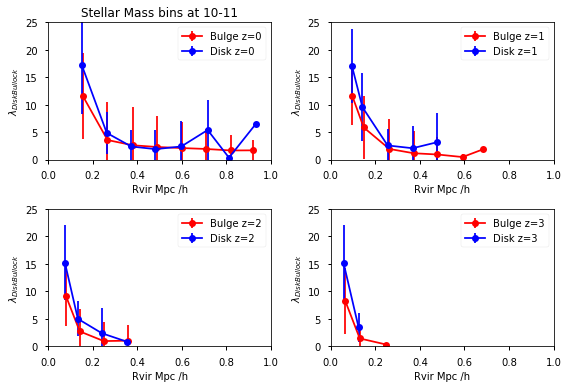

In [27]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.errorbar(bulgedom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][0],
             bulgedom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=bulgedom_cen_DSage['slambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='r', label='Bulge z=0')

plt.errorbar(diskdom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][0],
             diskdom_cen_DSage['slambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=diskdom_cen_DSage['slambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='b', label='Disk z=0')

plt.title('Stellar Mass bins at 10-11')
plt.xlim(0, 1)
plt.ylim(0, 25)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Disk Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])

plt.subplot(222)
plt.errorbar(bulgedom_cen_DSage['slambda_Rvir_meanbin_z1_SM10_11'][0],
             bulgedom_cen_DSage['slambda_Rvir_meanbin_z1_SM10_11'][1],
            yerr=bulgedom_cen_DSage['slambda_Rvir_stdbin_z1_SM10_11'][1],
            marker='o', color='r', label='Bulge z=1')

plt.errorbar(diskdom_cen_DSage['slambda_Rvir_meanbin_z1_SM10_11'][0],
             diskdom_cen_DSage['slambda_Rvir_meanbin_z1_SM10_11'][1],
            yerr=diskdom_cen_DSage['slambda_Rvir_stdbin_z1_SM10_11'][1],
            marker='o', color='b', label='Disk z=1')


plt.xlim(0, 1)
plt.ylim(0, 25)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Disk Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplot(223)
plt.errorbar(bulgedom_cen_DSage['slambda_Rvir_meanbin_z2_SM10_11'][0],
             bulgedom_cen_DSage['slambda_Rvir_meanbin_z2_SM10_11'][1],
            yerr=bulgedom_cen_DSage['slambda_Rvir_stdbin_z2_SM10_11'][1],
            marker='o', color='r', label='Bulge z=2')

plt.errorbar(diskdom_cen_DSage['slambda_Rvir_meanbin_z2_SM10_11'][0],
             diskdom_cen_DSage['slambda_Rvir_meanbin_z2_SM10_11'][1],
            yerr=diskdom_cen_DSage['slambda_Rvir_stdbin_z2_SM10_11'][1],
            marker='o', color='b', label='Disk z=2')


plt.xlim(0, 1)
plt.ylim(0, 25)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Disk Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplot(224)
plt.errorbar(bulgedom_cen_DSage['slambda_Rvir_meanbin_z3_SM10_11'][0],
             bulgedom_cen_DSage['slambda_Rvir_meanbin_z3_SM10_11'][1],
            yerr=bulgedom_cen_DSage['slambda_Rvir_stdbin_z3_SM10_11'][1],
            marker='o', color='r', label='Bulge z=3')

plt.errorbar(diskdom_cen_DSage['slambda_Rvir_meanbin_z3_SM10_11'][0],
             diskdom_cen_DSage['slambda_Rvir_meanbin_z3_SM10_11'][1],
            yerr=diskdom_cen_DSage['slambda_Rvir_stdbin_z3_SM10_11'][1],
            marker='o', color='b', label='Disk z=3')


plt.xlim(0, 1)
plt.ylim(0, 25)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Disk Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')

plt.tight_layout()
#plt.savefig('morph_Centrals_stellarSpin_lambdavsRvir_SMbin10-11_DSAGE_z0toz3.png', dpi=100)

plt.show()

# Halo lambda

In [28]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(5):
        j = j + 7        
        bulgedom_cen_DSage["hlambda_z{0}_SM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        diskdom_cen_DSage["hlambda_z{0}_SM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_DSage["haloJ_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_DSage["Vvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_DSage["Rvir_z{0}_SM{1}_{2}".format(n1,n2,n2+1)])

  

In [29]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 20
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 0.175
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        bulgenorm_cen_DSage['hlambdahist_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(5):
        m2 = m2 + 7
        disknorm_cen_DSage['hlambdahist_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


/fs1/porrasaj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


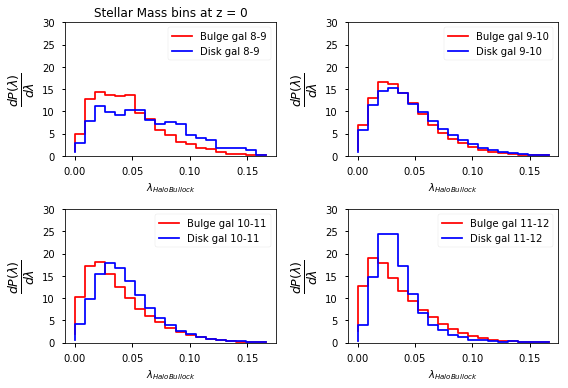

In [30]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM8_9'], color='r', label='Bulge gal 8-9')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM8_9'], color='b', label='Disk gal 8-9')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)     #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM9_10'], color='b', label='Disk gal 9-10')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)    #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM10_11'], color='b', label='Disk gal 10-11')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)    #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)   #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_DSAGE_SMbin8-12_z0.png', dpi=100)

plt.show()

In [31]:
import matplotlib.gridspec as gridspec

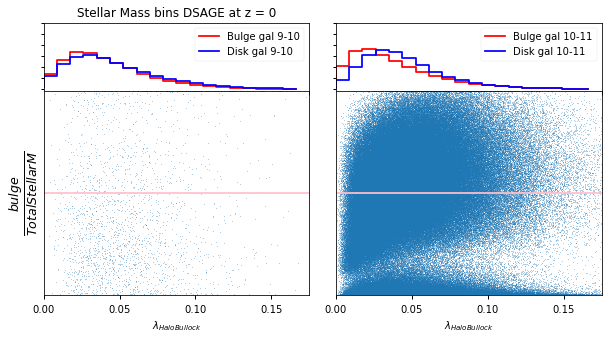

In [32]:
f = plt.figure(figsize=(10, 5))
gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 1],
                       height_ratios=[1, 3],
                       hspace=0, wspace=0.1)    
    
    
    
ax1 = plt.subplot(gs[0])
ax1.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
ax1.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM9_10'], color='b', label='Disk gal 9-10')
ax1.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
ax1.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
ax1.legend(loc=1)
plt.title('Stellar Mass bins DSAGE at z = 0')

ax2 = plt.subplot(gs[1], sharex=ax1)
ax2.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
ax2.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM10_11'], color='b', label='Disk gal 10-11')

ax2.set_xlim(0, 0.175)
ax2.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
ax2.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
ax2.axes.xaxis.set_ticklabels([])
ax2.axes.yaxis.set_ticklabels([])
ax2.legend(loc=1)

ax3 = plt.subplot(gs[2])
ax3.plot(gal_cen_DSage['gal_hlambda_z0_SM8_9'],gal_cen_DSage['morph_z0_SM8_9'],'.', markersize=1)
ax3.axhline(0.5, c ='pink')
ax3.set_xlim(0, 0.175)
ax3.set_ylim(0, 1)
ax3.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
ax3.axes.get_yaxis().set_ticks([])
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{bulge}{TotalStellarM}$', fontsize=18)

ax4 = plt.subplot(gs[3], sharex=ax3)
ax4.plot(gal_cen_DSage['gal_hlambda_z0_SM10_11'],gal_cen_DSage['morph_z0_SM10_11'], '.', markersize=1)
ax4.axhline(0.5, c ='pink')
ax4.set_ylim(0, 1)
ax4.set_xlim(0,0.175)
ax4.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
ax4.axes.get_yaxis().set_ticks([])
#ax4.axes.xaxis.set_ticklabels([])
#ax4.axes.yaxis.set_ticklabels([])
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)


#ax5 = plt.subplot(gs[4])
#ax6 = plt.subplot(gs[5])
#ax7 = plt.subplot(gs[6])
#ax8 = plt.subplot(gs[7])
#ax9 = plt.subplot(gs[8])
plt.style.use('seaborn-notebook')
#plt.tight_layout()
#plt.savefig('morph_HaloSpin_scatterbulge_histonorm_DSAGE_SMbin9-11_z0.png', dpi=100)
plt.show()

In [33]:
print len(gal_cen_DSage['morph_z0_SM9_10'])
print len(gal_cen_DSage['morph_z0_SM11_12'])

145674
46898


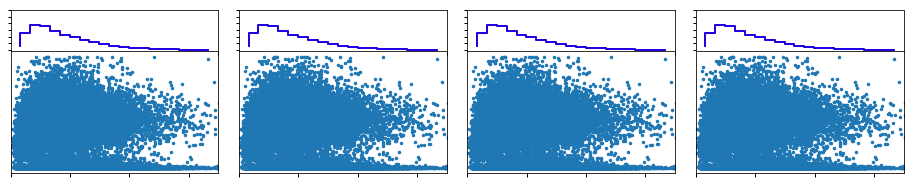

In [34]:
f = plt.figure(figsize=(16, 3))
gs = gridspec.GridSpec(1, 4,
#                        width_ratios=[1, 1],
#                        height_ratios=[1, 3],
                       hspace=0, wspace=0.1)

histobulge = [bulgenorm_cen_DSage['hlambdahist_z0_SM8_9'], bulgenorm_cen_DSage['hlambdahist_z0_SM9_10'], 
         bulgenorm_cen_DSage['hlambdahist_z0_SM10_11'], bulgenorm_cen_DSage['hlambdahist_z0_SM11_12'] ]

histodisk = [bulgenorm_cen_DSage['hlambdahist_z0_SM8_9'], bulgenorm_cen_DSage['hlambdahist_z0_SM9_10'], 
         bulgenorm_cen_DSage['hlambdahist_z0_SM10_11'], bulgenorm_cen_DSage['hlambdahist_z0_SM11_12'] ]

lambdah = [gal_cen_DSage['gal_hlambda_z0_SM8_9'], gal_cen_DSage['gal_hlambda_z0_SM9_10'],
          gal_cen_DSage['gal_hlambda_z0_SM10_11'], gal_cen_DSage['gal_hlambda_z0_SM11_12']]

krot = [gal_cen_DSage['morph_z0_SM8_9'], gal_cen_DSage['morph_z0_SM9_10'], 
        gal_cen_DSage['morph_z0_SM10_11'], gal_cen_DSage['morph_z0_SM11_12']]

for ii in range(4):    
    gs_axes = gridspec.GridSpecFromSubplotSpec(2,1, gs[ii], height_ratios=[1,3], hspace=0)
    ax_1 = plt.Subplot(f, gs_axes[0,:])
    ax_2 = plt.Subplot(f, gs_axes[1,:], sharex=ax1)
    f.add_subplot(ax_1)
    f.add_subplot(ax_2)
    ax_1.step(bins_cen, histobulge[i], color='r')
    ax_1.step(bins_cen, histodisk[i], color='b')
    ax_1.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
    ax_1.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
    ax_1.axes.xaxis.set_ticklabels([])
    ax_1.axes.yaxis.set_ticklabels([])
    ax_2.plot(lambdah[i], krot[i], '.')
    ax_2.set_xlim(0, 0.175)
    ax_2.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
    ax_2.axes.get_yaxis().set_ticks([])


"""    
    
gs_axes = gridspec.GridSpecFromSubplotSpec(2,1, gs[0], height_ratios=[1,3], hspace=0)    
ax1 = plt.Subplot(f, gs_axes[0,0])
ax1.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM8_9'], color='r', label='Bulge gal 8-9')
ax1.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM8_9'], color='b', label='Disk gal 8-9')
ax1.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
ax1.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
ax1.axes.xaxis.set_ticklabels([])
ax1.axes.yaxis.set_ticklabels([])
ax1.legend(loc=1)

ax2 = plt.Subplot(f, gs_axes[1,0], sharex=ax1)
ax2.plot(gal_cen_DSage['gal_hlambda_z0_SM8_9'],gal_cen_DSage['morph_z0_SM8_9'],'.')
ax2.set_xlim(0, 0.175)
ax2.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
ax2.axes.get_yaxis().set_ticks([])
f.add_subplot(ax1)
f.add_subplot(ax2)


gs_axes = gridspec.GridSpecFromSubplotSpec(2,1, gs[1], height_ratios=[1,3], hspace=0)
ax3 = plt.Subplot(f, gs_axes[0,2])
ax3.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
ax3.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM9_10'], color='b', label='Disk gal 9-10')
ax3.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
ax3.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
ax3.axes.xaxis.set_ticklabels([])
ax3.axes.yaxis.set_ticklabels([])
ax3.legend(loc=1)


ax4 = plt.Subplot(f, gs_axes[1,1], sharex=ax3)
ax4.plot(gal_cen_DSage['gal_hlambda_z0_SM9_10'],gal_cen_DSage['morph_z0_SM9_10'],'.')
ax4.set_xlim(0, 0.175)
ax4.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
ax4.axes.get_yaxis().set_ticks([])
f.add_subplot(ax3)
f.add_subplot(ax4)

# ax2 = plt.subplot(gs[1], sharex=ax1)
# ax2.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
# ax2.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM10_11'], color='b', label='Disk gal 10-11')

# ax2.set_xlim(0, 0.175)
# ax2.axes.get_xaxis().set_ticks([0, 0.025, 0.05, 0.075, 0.1, 0.125, 0.15, 0.175])
# ax2.axes.get_yaxis().set_ticks([0, 5, 10, 15, 20, 25, 30])
# ax2.axes.xaxis.set_ticklabels([])
# ax2.axes.yaxis.set_ticklabels([])
# ax2.legend(loc=1)




# ax4 = plt.subplot(gs[3], sharex=ax3)
# ax4.plot(gal_cen_DSage['gal_hlambda_z0_SM10_11'],gal_cen_DSage['morph_z0_SM10_11'],'.')

# ax4.set_xlim(0,0.175)
# ax4.axes.get_xaxis().set_ticks([0, 0.05, 0.1, 0.15])
# # ax4.axes.get_yaxis().set_ticks([])
# # ax4.axes.xaxis.set_ticklabels([])
# ax4.axes.yaxis.set_ticklabels([])


#ax5 = plt.subplot(gs[4])
#ax6 = plt.subplot(gs[5])
#ax7 = plt.subplot(gs[6])
#ax8 = plt.subplot(gs[7])
#ax9 = plt.subplot(gs[8])

"""

plt.show()

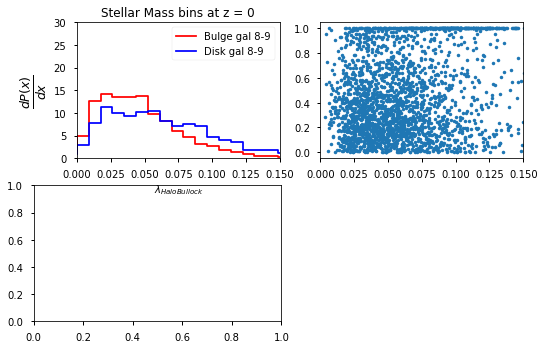

In [35]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

gs1 = gridspec.GridSpec(2, 1)
gs1.update(left=0.05, right=0.48, wspace=0.05)
ax1 = plt.subplot(gs1[:-1, :])
ax2 = plt.subplot(gs1[-1, :-1])
ax3 = plt.subplot(gs1[-1, -1])


#gs2 = gridspec.GridSpec(2, 1)
#gs2.update(left=0.55, right=0.98, hspace=0.05)
#ax4 = plt.subplot(gs2[:, :-1])
#ax5 = plt.subplot(gs2[:-1, -1])
#ax6 = plt.subplot(gs2[-1, -1])



fig1 = plt.subplot(221)    #plt.subplot2grid((2,4), (0,0))
fig1.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM8_9'], color='r', label='Bulge gal 8-9')
fig1.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM8_9'], color='b', label='Disk gal 8-9')
#plt.xticks([0, 0.05, 0.1, 0.15])
fig1.set_xlim(0, 0.15)
fig1.set_ylim(0, 30)     #(0, 0.25)
fig1.set_xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
fig1.set_ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
fig1.set_title('Stellar Mass bins at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
fig1.legend(loc=1)

fig2 = plt.subplot(222)
#fig2.plot(bins_cen, bulgedom_cen_DSage['haloJ_z0_SM8_9'], bulgedom_cen_DSage['bulgepseudo_z0_SM8_9']/bulgedom_cen_DSage['TSM_z0_SM8_9'] ,'.')
fig2.plot(gal_cen_DSage['gal_hlambda_z0_SM8_9'],gal_cen_DSage['morph_z0_SM8_9'],'.')
fig2.set_xlim(0, 0.15)


"""
fig2 = plt.subplot2grid((2,4),(0,1))
fig2.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM9_10'], color='r', label='Bulge gal 9-10')
fig2.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM9_10'], color='b', label='Disk gal 9-10')
#plt.xticks([0, 0.05, 0.1, 0.15])
fig2.set_xlim(0, 0.15)
fig2.set_ylim(0, 30)    #(0, 0.25)
fig2.set_xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
fig2.set_ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
fig2.legend(loc=1)


fig3 = plt.subplot2grid((2,4),(0,2))
fig3.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM10_11'], color='r', label='Bulge gal 10-11')
fig3.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM10_11'], color='b', label='Disk gal 10-11')
#plt.xticks([0, 0.05, 0.1, 0.15])
fig3.set_xlim(0, 0.15)
fig3.set_ylim(0, 30)    #(0, 0.25)
fig3.set_xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
fig3.set_ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
fig3.legend(loc=1)



fig4 = plt.subplot2grid((2,4),(0,3))
fig4.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM11_12'], color='r', label='Bulge gal 11-12')
fig4.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM11_12'], color='b', label='Disk gal 11-12')
#plt.xticks([0, 0.05, 0.1, 0.15])
fig4.set_xlim(0, 0.15)
fig4.set_ylim(0, 30)   #(0, 0.25)
fig4.set_xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
fig4.set_ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
fig4.legend(loc=1)
"""


#plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    #wspace=0.35)
plt.style.use('seaborn-notebook')
#plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_DSAGE_SMbin8-12_z0.png', dpi=100)

plt.show()

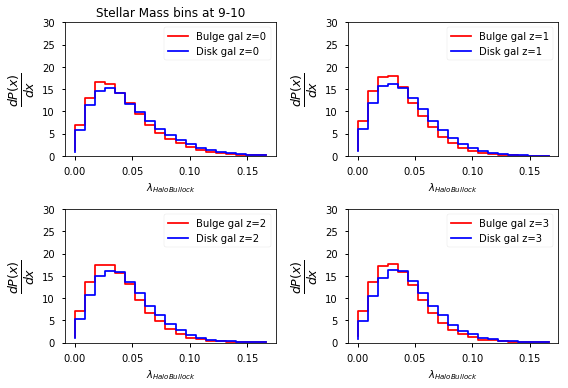

In [36]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM9_10'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM9_10'], color='b', label='Disk gal z=0')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)     #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
plt.title('Stellar Mass bins at 9-10')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_SM9_10'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z1_SM9_10'], color='b', label='Disk gal z=1')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)    #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_SM9_10'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z2_SM9_10'], color='b', label='Disk gal z=2')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)    #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_SM9_10'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z3_SM9_10'], color='b', label='Disk gal z=3')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)   #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_DSAGE_SMbin9-10_z0toz3.png', dpi=100)

plt.show()

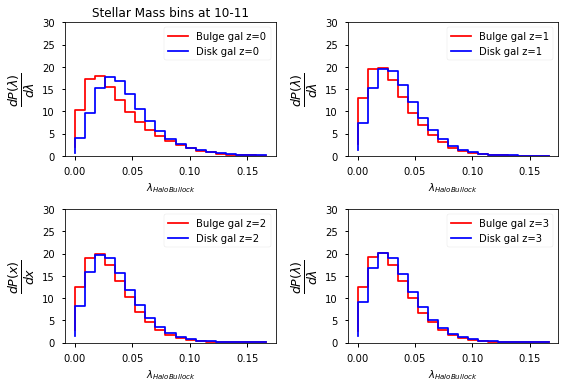

In [37]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_SM10_11'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_SM10_11'], color='b', label='Disk gal z=0')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)     #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Stellar Mass bins at 10-11')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_SM10_11'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z1_SM10_11'], color='b', label='Disk gal z=1')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)    #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_SM10_11'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z2_SM10_11'], color='b', label='Disk gal z=2')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)    #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(x)}{dx}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_SM10_11'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z3_SM10_11'], color='b', label='Disk gal z=3')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 20)
plt.ylim(0, 30)   #(0, 0.25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_DSAGE_SMbin10-11_z0toz3.png', dpi=100)

plt.show()

In [38]:
n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(5):
        n2 = n2 + 7
        bulgedom_cen_DSage['hlambda_Rvir_meanbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = meanbin(bulgedom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        bulgedom_cen_DSage['hlambda_Rvir_stdbin_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)] = stdbin(bulgedom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)], bulgedom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(n1,n2,n2+1)])
        

        
    
for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(5):
        m2 = m2 + 7
        diskdom_cen_DSage['hlambda_Rvir_meanbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = meanbin(diskdom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])
        diskdom_cen_DSage['hlambda_Rvir_stdbin_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)] = stdbin(diskdom_cen_DSage['Rvir_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)], diskdom_cen_DSage['hlambda_z{0}_SM{1}_{2}'.format(m1,m2,m2+1)])


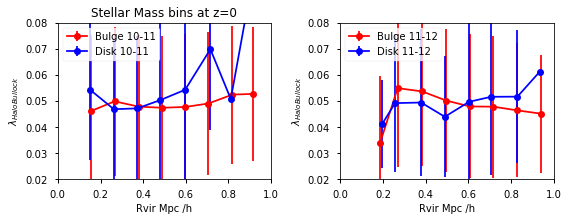

In [39]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.errorbar(bulgedom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][0],
             bulgedom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=bulgedom_cen_DSage['hlambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='r', label='Bulge 10-11')

plt.errorbar(diskdom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][0],
             diskdom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=diskdom_cen_DSage['hlambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='b', label='Disk 10-11')

plt.title('Stellar Mass bins at z=0')
plt.xlim(0, 1)
plt.ylim(0.02, 0.08)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Halo Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=2, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])

plt.subplot(222)
plt.errorbar(bulgedom_cen_DSage['hlambda_Rvir_meanbin_z0_SM11_12'][0],
             bulgedom_cen_DSage['hlambda_Rvir_meanbin_z0_SM11_12'][1],
            yerr=bulgedom_cen_DSage['hlambda_Rvir_stdbin_z0_SM11_12'][1],
            marker='o', color='r', label='Bulge 11-12')

plt.errorbar(diskdom_cen_DSage['hlambda_Rvir_meanbin_z0_SM11_12'][0],
             diskdom_cen_DSage['hlambda_Rvir_meanbin_z0_SM11_12'][1],
            yerr=diskdom_cen_DSage['hlambda_Rvir_stdbin_z0_SM11_12'][1],
            marker='o', color='b', label='Disk 11-12')


plt.xlim(0, 1)
plt.ylim(0.02, 0.08)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Halo Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=2, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')

plt.tight_layout()
#plt.savefig('morph_Centrals_haloSpin_lambdavsRvir_SMbin10-12_DSAGE_z0.png', dpi=100)

plt.show()

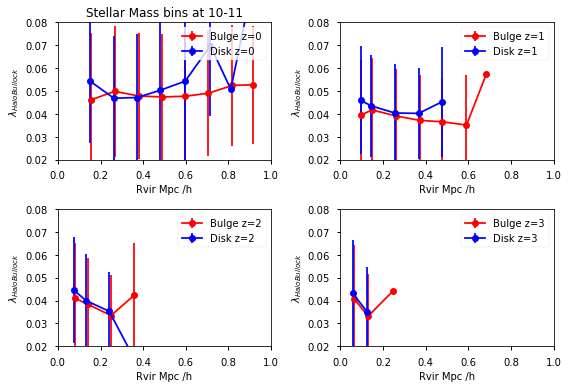

In [40]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.errorbar(bulgedom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][0],
             bulgedom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=bulgedom_cen_DSage['hlambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='r', label='Bulge z=0')

plt.errorbar(diskdom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][0],
             diskdom_cen_DSage['hlambda_Rvir_meanbin_z0_SM10_11'][1],
            yerr=diskdom_cen_DSage['hlambda_Rvir_stdbin_z0_SM10_11'][1],
            marker='o', color='b', label='Disk z=0')

plt.title('Stellar Mass bins at 10-11')
plt.xlim(0, 1)
plt.ylim(0.02, 0.08)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Halo Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])

plt.subplot(222)
plt.errorbar(bulgedom_cen_DSage['hlambda_Rvir_meanbin_z1_SM10_11'][0],
             bulgedom_cen_DSage['hlambda_Rvir_meanbin_z1_SM10_11'][1],
            yerr=bulgedom_cen_DSage['hlambda_Rvir_stdbin_z1_SM10_11'][1],
            marker='o', color='r', label='Bulge z=1')

plt.errorbar(diskdom_cen_DSage['hlambda_Rvir_meanbin_z1_SM10_11'][0],
             diskdom_cen_DSage['hlambda_Rvir_meanbin_z1_SM10_11'][1],
            yerr=diskdom_cen_DSage['hlambda_Rvir_stdbin_z1_SM10_11'][1],
            marker='o', color='b', label='Disk z=1')


plt.xlim(0, 1)
plt.ylim(0.02, 0.08)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Halo Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplot(223)
plt.errorbar(bulgedom_cen_DSage['hlambda_Rvir_meanbin_z2_SM10_11'][0],
             bulgedom_cen_DSage['hlambda_Rvir_meanbin_z2_SM10_11'][1],
            yerr=bulgedom_cen_DSage['hlambda_Rvir_stdbin_z2_SM10_11'][1],
            marker='o', color='r', label='Bulge z=2')

plt.errorbar(diskdom_cen_DSage['hlambda_Rvir_meanbin_z2_SM10_11'][0],
             diskdom_cen_DSage['hlambda_Rvir_meanbin_z2_SM10_11'][1],
            yerr=diskdom_cen_DSage['hlambda_Rvir_stdbin_z2_SM10_11'][1],
            marker='o', color='b', label='Disk z=2')


plt.xlim(0, 1)
plt.ylim(0.02, 0.08)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Halo Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])


plt.subplot(224)
plt.errorbar(bulgedom_cen_DSage['hlambda_Rvir_meanbin_z3_SM10_11'][0],
             bulgedom_cen_DSage['hlambda_Rvir_meanbin_z3_SM10_11'][1],
            yerr=bulgedom_cen_DSage['hlambda_Rvir_stdbin_z3_SM10_11'][1],
            marker='o', color='r', label='Bulge z=3')

plt.errorbar(diskdom_cen_DSage['hlambda_Rvir_meanbin_z3_SM10_11'][0],
             diskdom_cen_DSage['hlambda_Rvir_meanbin_z3_SM10_11'][1],
            yerr=diskdom_cen_DSage['hlambda_Rvir_stdbin_z3_SM10_11'][1],
            marker='o', color='b', label='Disk z=3')


plt.xlim(0, 1)
plt.ylim(0.02, 0.08)
plt.xlabel('Rvir Mpc /h',  fontsize=10)
plt.ylabel('$\lambda_{Halo Bullock}$',  fontsize=10)
#plt.title('Central Galaxies Mvir vs. Stellar Mass ')
plt.legend(loc=1, numpoints=1)
#plt.axis([1e11, 1e15, 1e9, 1e12])



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')

plt.tight_layout()
#plt.savefig('morph_Centrals_haloSpin_lambdavsRvir_SMbin10-11_DSAGE_z0toz3.png', dpi=100)

plt.show()

# Binning Halo Mass

In [41]:
##################################### BULGE MASS #################################
bulgemassbin_cen_DSage = {}
i=0
    
for i in range(len(bulge_gal_cen_DSage)):
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_HM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["Mvir_z{0}".format(i)] >= 1e11, 
                                                                                     bulgedom_cen_DSage["Mvir_z{0}".format(i)] <= 1e12))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_HM12_13".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["Mvir_z{0}".format(i)] > 1e12, 
                                                                                     bulgedom_cen_DSage["Mvir_z{0}".format(i)] <= 1e13))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_HM13_14".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["Mvir_z{0}".format(i)] > 1e13, 
                                                                                     bulgedom_cen_DSage["Mvir_z{0}".format(i)] <= 1e14))[0]

    
    bulgemassbin_cen_DSage["bulgedom_z{0}_HM11_12".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_HM11_12".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_HM12_13".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_HM12_13".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_HM13_14".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_HM13_14".format(i)]]


In [42]:
################################################ DISK MASS ####################################################
diskmassbin_cen_DSage = {}
i=0
    
for i in range(len(disk_gal_cen_DSage)):

    diskmassbin_cen_DSage["disk_idx_z{0}_HM11_12".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["Mvir_z{0}".format(i)] > 1e11, 
                                                                                     diskdom_cen_DSage["Mvir_z{0}".format(i)] <= 1e12))[0]

    diskmassbin_cen_DSage["disk_idx_z{0}_HM12_13".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["Mvir_z{0}".format(i)] > 1e12, 
                                                                                     diskdom_cen_DSage["Mvir_z{0}".format(i)] <= 1e13))[0]

    diskmassbin_cen_DSage["disk_idx_z{0}_HM13_14".format(i)] = np.where(np.logical_and(diskdom_cen_DSage["Mvir_z{0}".format(i)] > 1e13, 
                                                                                     diskdom_cen_DSage["Mvir_z{0}".format(i)] <= 1e14))[0]

    
    diskmassbin_cen_DSage["diskdom_z{0}_HM11_12".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_HM11_12".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_HM12_13".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_HM12_13".format(i)]]
    diskmassbin_cen_DSage["diskdom_z{0}_HM13_14".format(i)] = disk_gal_cen_DSage[i][diskmassbin_cen_DSage["disk_idx_z{0}_HM13_14".format(i)]]




In [43]:
#bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(3):
        j = j+ 11
        bulgedom_cen_DSage["Mvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_DSage["TSM_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_DSage["CGMvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_DSage["bulgepseudo_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        bulgedom_cen_DSage["DSM_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']            
        bulgedom_cen_DSage["Vvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_DSage["Rvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_DSage["xpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_DSage["ypos_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_DSage["zpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_DSage["xvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_DSage["yvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_DSage["zvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_DSage["xSDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["ySDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["zSDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["xGDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["yGDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["zGDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["xhaloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        bulgedom_cen_DSage["yhaloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        bulgedom_cen_DSage["zhaloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
    
        bulgedom_cen_DSage["JSD_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        bulgedom_cen_DSage["pos_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["vel_z{0}_SM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["SDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["GDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["haloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2) 
    


In [44]:
#disk_gal_cen_DSage = [diskdom_cen_z0DSage, diskdom_cen_z1DSage, diskdom_cen_z2DSage, diskdom_cen_z3DSage]
i=0
j=0
for i in range(len(disk_gal_cen_DSage)):
    for j in range(3):
        j = j + 11
        diskdom_cen_DSage["Mvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Mvir']
        diskdom_cen_DSage["TSM_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        diskdom_cen_DSage["CGMvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        diskdom_cen_DSage["bulgepseudo_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        diskdom_cen_DSage["DSM_z{0}_HM{1}_{2}".format(i,j,j+1)] = 1e10*diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']                    
        diskdom_cen_DSage["Vvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Vvir']
        diskdom_cen_DSage["Rvir_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Rvir']            
        diskdom_cen_DSage["xpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X']
        diskdom_cen_DSage["ypos_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y']
        diskdom_cen_DSage["zpos_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z']
        diskdom_cen_DSage["xvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        diskdom_cen_DSage["yvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        diskdom_cen_DSage["zvel_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        diskdom_cen_DSage["xSDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["ySDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["zSDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        diskdom_cen_DSage["xGDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        diskdom_cen_DSage["yGDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        diskdom_cen_DSage["zGDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        diskdom_cen_DSage["xhaloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        diskdom_cen_DSage["yhaloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        diskdom_cen_DSage["zhaloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
    
        diskdom_cen_DSage["JSD_z{0}_HM{1}_{2}".format(i,j,j+1)] = diskmassbin_cen_DSage['diskdom_z{0}_HM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        
        diskdom_cen_DSage["pos_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['ypos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zpos_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["vel_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zvel_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["SDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xSDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['ySDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zSDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["GDspin_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xGDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yGDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zGDspin_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2)
    
        diskdom_cen_DSage["haloJ_z{0}_HM{1}_{2}".format(i,j,j+1)] = np.sqrt(diskdom_cen_DSage['xhaloJ_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['yhaloJ_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    diskdom_cen_DSage['zhaloJ_z{0}_HM{1}_{2}'.format(i,j,j+1)]**2) 
    

    

# Calculating Lambda Spin

# Stellar lambda

In [45]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(3):
        j = j + 11        
        bulgedom_cen_DSage["slambda_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["JSD_z{0}_HM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_HM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_HM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_DSage)):
    for n2 in range(3):
        n2 = n2 + 11
        diskdom_cen_DSage["slambda_z{0}_HM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_DSage["JSD_z{0}_HM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_DSage["Vvir_z{0}_HM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_DSage["Rvir_z{0}_HM{1}_{2}".format(n1,n2,n2+1)])

  

In [46]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 30
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 30  
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(3):
        n2 = n2 + 11
        bulgenorm_cen_DSage['slambdahist_z{0}_HM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['slambda_z{0}_HM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(3):
        m2 = m2 + 11
        disknorm_cen_DSage['slambdahist_z{0}_HM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_DSage['slambda_z{0}_HM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


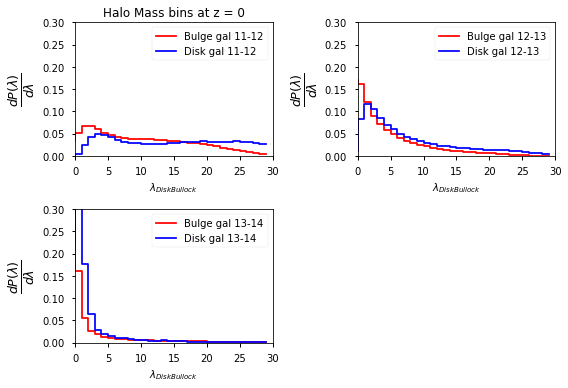

In [47]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_HM11_12'], color='b', label='Disk gal 11-12')
plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Halo Mass bins at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HM12_13'], color='r', label='Bulge gal 12-13')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_HM12_13'], color='b', label='Disk gal 12-13')
plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HM13_14'], color='r', label='Bulge gal 13-14')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_HM13_14'], color='b', label='Disk gal 13-14')
plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


"""
plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_Sage['slambdahist_z0_HM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_Sage['slambdahist_z0_HM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Stellar Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)
"""



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin11-14_z0.png')

plt.show()

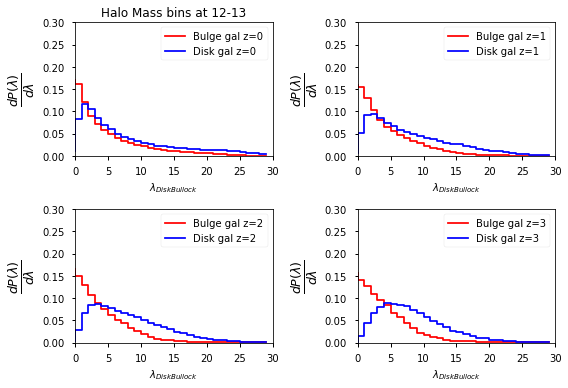

In [48]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HM12_13'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z0_HM12_13'], color='b', label='Disk gal z=0')
plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Halo Mass bins at 12-13')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_HM12_13'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z1_HM12_13'], color='b', label='Disk gal z=1')
plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_HM12_13'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z2_HM12_13'], color='b', label='Disk gal z=2')
plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_HM12_13'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_DSage['slambdahist_z3_HM12_13'], color='b', label='Disk gal z=3')
#plt.xticks([0, 0.05, 0.1, 0.15])
plt.xlim(0, 30)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin12-13_z0toz3.png')

plt.show()

# Halo lambda

In [49]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(3):
        j = j + 11        
        bulgedom_cen_DSage["hlambda_z{0}_HM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["haloJ_z{0}_HM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_HM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_HM{1}_{2}".format(i,j,j+1)])


n1 = 0
n2 = 0
for n1 in range(len(disk_gal_cen_DSage)):
    for n2 in range(3):
        n2 = n2 + 11
        diskdom_cen_DSage["hlambda_z{0}_HM{1}_{2}".format(n1,n2,n2+1)] = diskdom_cen_DSage["haloJ_z{0}_HM{1}_{2}".format(n1,n2,n2+1)]/(np.sqrt(2)*diskdom_cen_DSage["Vvir_z{0}_HM{1}_{2}".format(n1,n2,n2+1)]*
                                                                diskdom_cen_DSage["Rvir_z{0}_HM{1}_{2}".format(n1,n2,n2+1)])

  

In [50]:
# creating a normalized histogram for central bulge and disk spin
Nbins_global = 20
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 0.175   
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(3):
        n2 = n2 + 11
        bulgenorm_cen_DSage['hlambdahist_z{0}_HM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['hlambda_z{0}_HM{1}_{2}'.format(n1,n2,n2+1)])

    
for m1 in range(len(disk_gal_cen_DSage)):
    for m2 in range(3):
        m2 = m2 + 11
        disknorm_cen_DSage['hlambdahist_z{0}_HM{1}_{2}'.format(m1,m2,m2+1)] = normalizing(diskdom_cen_DSage['hlambda_z{0}_HM{1}_{2}'.format(m1,m2,m2+1)])


bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


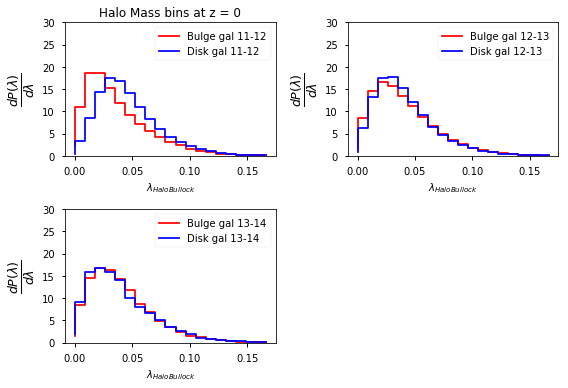

In [51]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_HM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 15)
plt.ylim(0, 30)    #(0, 0.30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Halo Mass bins at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HM12_13'], color='r', label='Bulge gal 12-13')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_HM12_13'], color='b', label='Disk gal 12-13')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 15)
plt.ylim(0, 30)  #(0, 0.30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HM13_14'], color='r', label='Bulge gal 13-14')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_HM13_14'], color='b', label='Disk gal 13-14')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 15)
plt.ylim(0, 30)  # (0, 0.30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


"""
plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HM11_12'], color='r', label='Bulge gal 11-12')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_HM11_12'], color='b', label='Disk gal 11-12')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)
"""



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_HaloSpin_histonorm_DSAGE_Mbin11-14_z0.png')

plt.show()

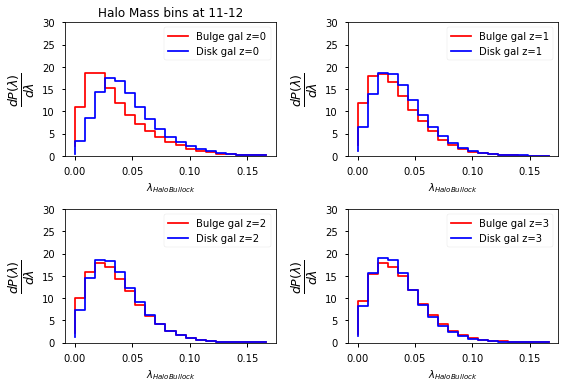

In [52]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HM11_12'], color='r', label='Bulge gal z=0')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z0_HM11_12'], color='b', label='Disk gal z=0')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 15)
plt.ylim(0, 30)    #(0, 0.30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Halo Mass bins at 11-12')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_HM11_12'], color='r', label='Bulge gal z=1')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z1_HM11_12'], color='b', label='Disk gal z=1')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 15)
plt.ylim(0, 30)  #(0, 0.30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_HM11_12'], color='r', label='Bulge gal z=2')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z2_HM11_12'], color='b', label='Disk gal z=2')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0, 15)
plt.ylim(0, 30)  # (0, 0.30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_HM11_12'], color='r', label='Bulge gal z=3')
plt.step(bins_cen, disknorm_cen_DSage['hlambdahist_z3_HM11_12'], color='b', label='Disk gal z=3')
plt.xticks([0, 0.05, 0.1, 0.15])
#plt.xlim(0,0.15)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
#plt.title('Morphology of Centrals Halo Spin Histogram')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)




plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
plt.savefig('morph_Centrals_HaloSpin_histonorm_DSAGE_Mbin12-13_z0toz3.png')

plt.show()

# Binning Hot gas mass

In [53]:
##################################### BULGE MASS #################################
bulgemassbin_cen_DSage = {}
i=0
    
for i in range(len(bulge_gal_cen_DSage)):
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM9_10".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["HotGM_z{0}".format(i)] >= 1e9, 
                                                                                     bulgedom_cen_DSage["HotGM_z{0}".format(i)] <= 1e10))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM10_11".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["HotGM_z{0}".format(i)] > 1e10, 
                                                                                     bulgedom_cen_DSage["HotGM_z{0}".format(i)] <= 1e11))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["HotGM_z{0}".format(i)] > 1e11, 
                                                                                     bulgedom_cen_DSage["HotGM_z{0}".format(i)] <= 1e12))[0]
   
    bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM12_13".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["HotGM_z{0}".format(i)] > 1e12, 
                                                                                     bulgedom_cen_DSage["HotGM_z{0}".format(i)] <= 1e13))[0]
    
    bulgemassbin_cen_DSage["bulgedom_z{0}_HotGM9_10".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM9_10".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_HotGM10_11".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM10_11".format(i)]]    
    bulgemassbin_cen_DSage["bulgedom_z{0}_HotGM11_12".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM11_12".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_HotGM12_13".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_HotGM12_13".format(i)]]


In [54]:
#bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j+ 9
        bulgedom_cen_DSage["Mvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_DSage["TSM_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_DSage["CGMvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_DSage["bulgepseudo_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        bulgedom_cen_DSage["DSM_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']            
        bulgedom_cen_DSage["Vvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_DSage["Rvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_DSage["xpos_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_DSage["ypos_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_DSage["zpos_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_DSage["xvel_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_DSage["yvel_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_DSage["zvel_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_DSage["xSDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["ySDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["zSDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["xGDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["yGDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["zGDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["xhaloJ_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        bulgedom_cen_DSage["yhaloJ_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        bulgedom_cen_DSage["zhaloJ_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
    
        bulgedom_cen_DSage["JSD_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        bulgedom_cen_DSage["pos_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["vel_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["SDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["GDspin_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["haloJ_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}_HotGM{1}_{2}'.format(i,j,j+1)]**2) 
    


# Calculating Disk lambda

In [55]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 9        
        bulgedom_cen_DSage["slambda_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["JSD_z{0}_HotGM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)])

  

In [110]:
#Ejected matter: 50 N bins, dmax = 30
#Hot Gas Matter: 
    # creating a normalized histogram for central bulge and disk spin
Nbins_global = 40
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = -0.3
dmax = 30  
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 9
        bulgenorm_cen_DSage['slambdahist_z{0}_HotGM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['slambda_z{0}_HotGM{1}_{2}'.format(n1,n2,n2+1)])



bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


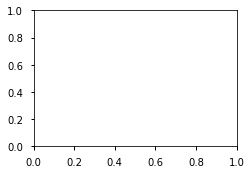

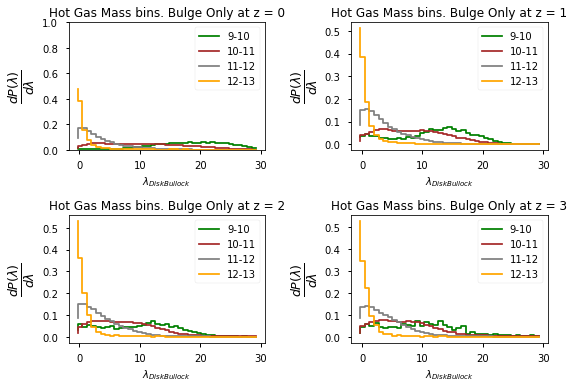

In [111]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 1)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
#plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 1')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
#plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 2')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
#plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 3')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin11-14_z0.png')

plt.show()

# Calculating Halo lambda

In [112]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 9        
        bulgedom_cen_DSage["hlambda_z{0}_HotGM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["haloJ_z{0}_HotGM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_HotGM{1}_{2}".format(i,j,j+1)])

  

In [113]:
#Ejected matter: 50 N bins, dmax = 0.2 
    # creating a normalized histogram for central bulge and disk spin
Nbins_global = 50   
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 0.175  
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 9
        bulgenorm_cen_DSage['hlambdahist_z{0}_HotGM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['hlambda_z{0}_HotGM{1}_{2}'.format(n1,n2,n2+1)])



bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


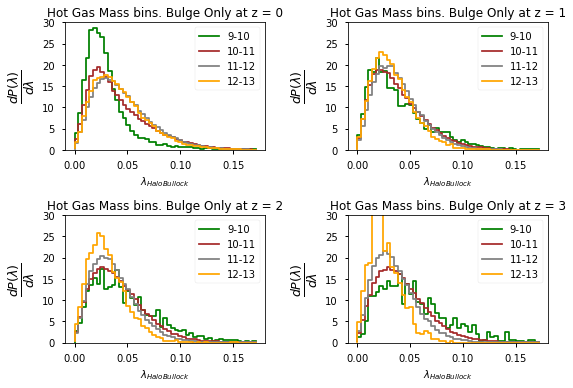

In [115]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 1')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 2')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_HotGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_HotGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_HotGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_HotGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Hot Gas Mass bins. Bulge Only at z = 3')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin19-13_z0toz3.png')

plt.show()

# Binning Cold Gas Mass

In [61]:
 ##################################### BULGE MASS #################################
bulgemassbin_cen_DSage = {}
i=0
    
for i in range(len(bulge_gal_cen_DSage)):
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM9_10".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["ColdGM_z{0}".format(i)] >= 1e9, 
                                                                                     bulgedom_cen_DSage["ColdGM_z{0}".format(i)] <= 1e10))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM10_11".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["ColdGM_z{0}".format(i)] > 1e10, 
                                                                                     bulgedom_cen_DSage["ColdGM_z{0}".format(i)] <= 1e11))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["ColdGM_z{0}".format(i)] > 1e11, 
                                                                                     bulgedom_cen_DSage["ColdGM_z{0}".format(i)] <= 1e12))[0]
   
    bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM12_13".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["ColdGM_z{0}".format(i)] > 1e12, 
                                                                                     bulgedom_cen_DSage["ColdGM_z{0}".format(i)] <= 1e13))[0]
    
    bulgemassbin_cen_DSage["bulgedom_z{0}_ColdGM9_10".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM9_10".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_ColdGM10_11".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM10_11".format(i)]]    
    bulgemassbin_cen_DSage["bulgedom_z{0}_ColdGM11_12".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM11_12".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_ColdGM12_13".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_ColdGM12_13".format(i)]]


In [62]:
#bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j+ 9
        bulgedom_cen_DSage["Mvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_DSage["TSM_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_DSage["CGMvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_DSage["bulgepseudo_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        bulgedom_cen_DSage["DSM_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']            
        bulgedom_cen_DSage["Vvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_DSage["Rvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_DSage["xpos_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_DSage["ypos_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_DSage["zpos_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_DSage["xvel_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_DSage["yvel_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_DSage["zvel_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_DSage["xSDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["ySDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["zSDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["xGDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["yGDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["zGDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["xhaloJ_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        bulgedom_cen_DSage["yhaloJ_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        bulgedom_cen_DSage["zhaloJ_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
    
        bulgedom_cen_DSage["JSD_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        bulgedom_cen_DSage["pos_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["vel_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["SDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["GDspin_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["haloJ_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}_ColdGM{1}_{2}'.format(i,j,j+1)]**2) 
    


# Calculating disk lambda

In [63]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 9        
        bulgedom_cen_DSage["slambda_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["JSD_z{0}_ColdGM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)])

  

In [82]:
#Ejected matter: 50 N bins, dmax = 30
#Hot Gas Matter: 
    # creating a normalized histogram for central bulge and disk spin
Nbins_global = 40
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = -0.3
dmax = 30  
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 9
        bulgenorm_cen_DSage['slambdahist_z{0}_ColdGM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['slambda_z{0}_ColdGM{1}_{2}'.format(n1,n2,n2+1)])



bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


/fs1/porrasaj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


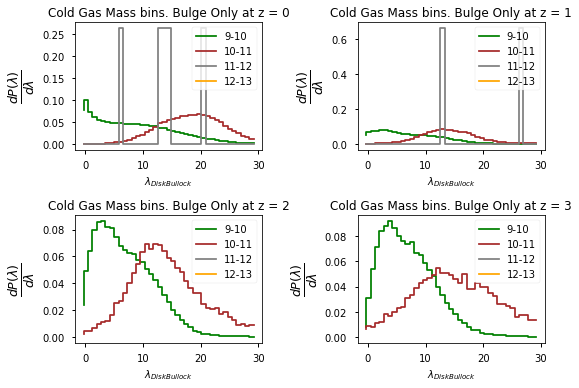

In [65]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_ColdGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
#plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_ColdGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
#plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 1')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_ColdGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
#plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 2')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_ColdGM10_11'], color='brown', label='10-11')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
#plt.ylim(0, 0.30)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 3')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin11-14_z0.png')

plt.show()

# Calculating Halo lambda

In [66]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 9        
        bulgedom_cen_DSage["hlambda_z{0}_ColdGM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["haloJ_z{0}_ColdGM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_ColdGM{1}_{2}".format(i,j,j+1)])

  

In [67]:
#Ejected matter: 50 N bins, dmax = 0.2 
    # creating a normalized histogram for central bulge and disk spin
Nbins_global = 50   
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 0.175  
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 9
        bulgenorm_cen_DSage['hlambdahist_z{0}_ColdGM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['hlambda_z{0}_ColdGM{1}_{2}'.format(n1,n2,n2+1)])



bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


/fs1/porrasaj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


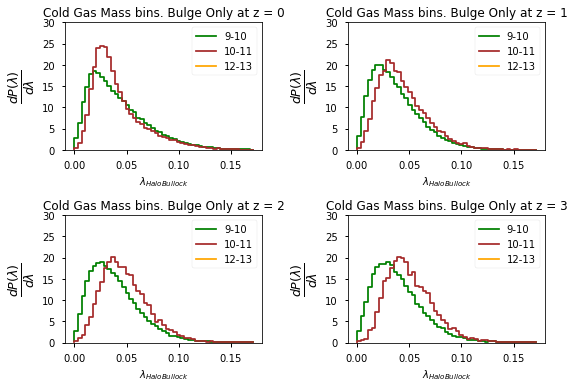

In [68]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_ColdGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_ColdGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 1')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_ColdGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 2')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_ColdGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_ColdGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_ColdGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_ColdGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 30)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Cold Gas Mass bins. Bulge Only at z = 3')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin11-14_z0.png')

plt.show()

# Binning Ejected Gas Mass

In [69]:
 ##################################### BULGE MASS #################################
bulgemassbin_cen_DSage = {}
i=0
    
for i in range(len(bulge_gal_cen_DSage)):
    
    bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM9_10".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] >= 1e9, 
                                                                                     bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] <= 1e10))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM10_11".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] > 1e10, 
                                                                                     bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] <= 1e11))[0]

    bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM11_12".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] > 1e11, 
                                                                                     bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] <= 1e12))[0]
   
    bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM12_13".format(i)] = np.where(np.logical_and(bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] > 1e12, 
                                                                                     bulgedom_cen_DSage["EjectedGM_z{0}".format(i)] <= 1e13))[0]
    
    bulgemassbin_cen_DSage["bulgedom_z{0}_EjectedGM9_10".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM9_10".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_EjectedGM10_11".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM10_11".format(i)]]    
    bulgemassbin_cen_DSage["bulgedom_z{0}_EjectedGM11_12".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM11_12".format(i)]]
    bulgemassbin_cen_DSage["bulgedom_z{0}_EjectedGM12_13".format(i)] = bulge_gal_cen_DSage[i][bulgemassbin_cen_DSage["bulge_idx_z{0}_EjectedGM12_13".format(i)]]


In [70]:
#bulge_gal_cen_DSage = [bulgedom_cen_z0DSage, bulgedom_cen_z1DSage, bulgedom_cen_z2DSage, bulgedom_cen_z3DSage]
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j+ 9
        bulgedom_cen_DSage["Mvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Mvir']
        bulgedom_cen_DSage["TSM_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Total_Stellar_Mass']
        bulgedom_cen_DSage["CGMvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Central_Galaxy_Mvir']
        bulgedom_cen_DSage["bulgepseudo_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Pseudobulge_Mass']
        bulgedom_cen_DSage["DSM_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = 1e10*bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Disk_Stellar_Mass']            
        bulgedom_cen_DSage["Vvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Vvir']
        bulgedom_cen_DSage["Rvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Rvir']
        bulgedom_cen_DSage["xpos_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['X']
        bulgedom_cen_DSage["ypos_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Y']
        bulgedom_cen_DSage["zpos_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Z']
        bulgedom_cen_DSage["xvel_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['X_Velocity']
        bulgedom_cen_DSage["yvel_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Y_Velocity']
        bulgedom_cen_DSage["zvel_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Z_Velocity']
        bulgedom_cen_DSage["xSDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["ySDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["zSDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Stellar_Disk']
        bulgedom_cen_DSage["xGDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['X_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["yGDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Y_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["zGDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['Z_Spin_of_Gas_Disk']
        bulgedom_cen_DSage["xhaloJ_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['jX_Halo']
        bulgedom_cen_DSage["yhaloJ_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['jY_Halo']
        bulgedom_cen_DSage["zhaloJ_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['jZ_Halo']      
    
        bulgedom_cen_DSage["JSD_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgemassbin_cen_DSage['bulgedom_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]['j_Stellar_Disk']        
        
        
        bulgedom_cen_DSage["pos_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xpos_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ypos_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zpos_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["vel_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xvel_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yvel_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zvel_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["SDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xSDspin_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['ySDspin_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zSDspin_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["GDspin_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xGDspin_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yGDspin_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zGDspin_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2)
    
        bulgedom_cen_DSage["haloJ_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = np.sqrt(bulgedom_cen_DSage['xhaloJ_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['yhaloJ_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2 + 
                                                    bulgedom_cen_DSage['zhaloJ_z{0}_EjectedGM{1}_{2}'.format(i,j,j+1)]**2) 
    


# Calculating disk lambda

In [71]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 9        
        bulgedom_cen_DSage["slambda_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["JSD_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)])


In [83]:
#Ejected matter: 50 N bins, dmax = 30
#Hot Gas Matter: 
    # creating a normalized histogram for central bulge and disk spin
Nbins_global = 40
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = -0.3
dmax = 30  
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 9
        bulgenorm_cen_DSage['slambdahist_z{0}_EjectedGM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['slambda_z{0}_EjectedGM{1}_{2}'.format(n1,n2,n2+1)])



bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


/fs1/porrasaj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


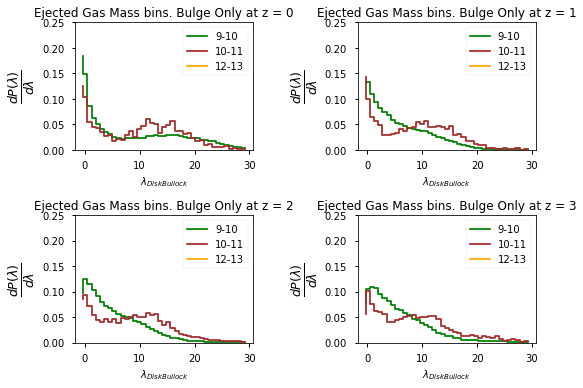

In [73]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z0_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 0.25)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z1_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 0.25)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 1')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z2_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 0.25)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 2')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['slambdahist_z3_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 30)
plt.ylim(0, 0.25)
plt.xlabel('$\lambda_{Disk Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 3')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin11-14_z0.png')

plt.show()

# Calculating Halo lambda

In [74]:
i = 0
j = 0
for i in range(len(bulge_gal_cen_DSage)):
    for j in range(4):
        j = j + 9        
        bulgedom_cen_DSage["hlambda_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)] = bulgedom_cen_DSage["haloJ_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)]/(np.sqrt(2)*bulgedom_cen_DSage["Vvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)]*
                                                                bulgedom_cen_DSage["Rvir_z{0}_EjectedGM{1}_{2}".format(i,j,j+1)])

  

In [75]:
#Ejected matter: 50 N bins, dmax = 0.2 
    # creating a normalized histogram for central bulge and disk spin
Nbins_global = 50   
Nbins_small = 30     #this is in case some samples need a more refined binning
dmin = 0.0
dmax = 0.175  
binwidth_cen = float((dmax-dmin)/Nbins_global)
binwidth_cen_s = float((dmax-dmin)/Nbins_small)    #this is in case some samples need a more refined binning
bins_cen = np.linspace(dmin, dmax, Nbins_global+1)
bins_cen_s = np.linspace(dmin, dmax, Nbins_small + 1)  #this is in case some samples need a more refined binning

n1 = 0
n2 = 0
m1 = 0
m2 = 0

for n1 in range(len(bulge_gal_cen_DSage)):
    for n2 in range(4):
        n2 = n2 + 9
        bulgenorm_cen_DSage['hlambdahist_z{0}_EjectedGM{1}_{2}'.format(n1,n2,n2+1)] = normalizing(bulgedom_cen_DSage['hlambda_z{0}_EjectedGM{1}_{2}'.format(n1,n2,n2+1)])



bins_cen = bins_cen[0:-1]      # + binwidth*0.5 plt.step does this for you. This is to center the number of points to the centre
bins_cen_s = bins_cen_s[0:-1]    #this is in case some samples need a more refined binning


/fs1/porrasaj/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


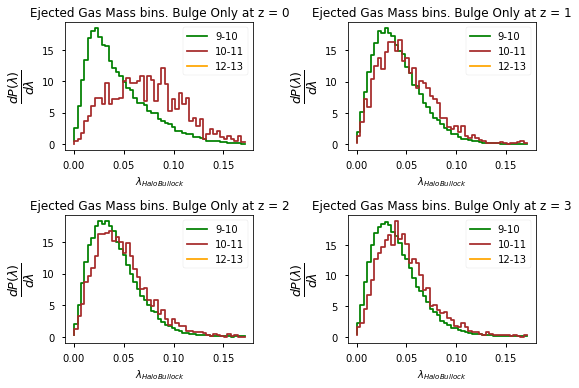

In [76]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z0_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 0.15)
#plt.ylim(0, 25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 0')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(222)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z1_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 0.15)
#plt.ylim(0, 25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 1')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(223)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z2_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 0.15)
#plt.ylim(0, 25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 2')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)

plt.subplot(224)
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_EjectedGM9_10'], color='green', label='9-10')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_EjectedGM10_11'], color='brown', label='10-11')
#plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_EjectedGM11_12'], color='grey', label='11-12')
plt.step(bins_cen, bulgenorm_cen_DSage['hlambdahist_z3_EjectedGM12_13'], color='orange', label='12-13')

#plt.xlim(0, 0.15)
#plt.ylim(0, 25)
plt.xlabel('$\lambda_{Halo Bullock}$', fontsize=10)
plt.ylabel(r'$\frac{dP(\lambda)}{d\lambda}$', fontsize=18)
plt.title('Ejected Gas Mass bins. Bulge Only at z = 3')
# blue_patch = mpatches.Patch(color='blue', label='SAGE z=0')
# plt.legend(handles=[blue_patch], loc=1)
plt.legend(loc=1)


plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
plt.tight_layout()
#plt.savefig('morph_Centrals_StellarSpin_histonorm_DSAGE_Mbin11-14_z0.png')

plt.show()

In [104]:
print binwidth_cen

0.7575


In [105]:
i=0
    
for i in range(len(bulge_gal_cen_DSage)):
    bulgedom_cen_DSage["DiskJcum_z{0}_TSM10_11".format(i)] = binwidth_cen*np.cumsum(bulgenorm_cen_DSage["slambdahist_z{0}_SM10_11".format(i)])
    bulgedom_cen_DSage["DiskJcum_z{0}_HotGM10_11".format(i)] = binwidth_cen*np.cumsum(bulgenorm_cen_DSage["slambdahist_z{0}_HotGM10_11".format(i)])
    bulgedom_cen_DSage["DiskJcum_z{0}_ColdGM10_11".format(i)] = binwidth_cen*np.cumsum(bulgenorm_cen_DSage["slambdahist_z{0}_ColdGM10_11".format(i)])
    bulgedom_cen_DSage["DiskJcum_z{0}_EjectedGM10_11".format(i)] = binwidth_cen*np.cumsum(bulgenorm_cen_DSage["slambdahist_z{0}_EjectedGM10_11".format(i)])
    
    bulgedom_cen_DSage["slambdamean_z{0}_TSM10_11".format(i)] = np.nanmean(bulgedom_cen_DSage['slambda_z{0}_SM10_11'.format(i)])
    bulgedom_cen_DSage["slambdamean_z{0}_HotGM10_11".format(i)] = np.nanmean(bulgedom_cen_DSage['slambda_z{0}_HotGM10_11'.format(i)])
    bulgedom_cen_DSage["slambdamean_z{0}_ColdGM10_11".format(i)] = np.nanmean(bulgedom_cen_DSage['slambda_z{0}_ColdGM10_11'.format(i)])
    bulgedom_cen_DSage["slambdamean_z{0}_EjectedGM10_11".format(i)] = np.nanmean(bulgedom_cen_DSage['slambda_z{0}_EjectedGM10_11'.format(i)])
    
    bulgedom_cen_DSage["slambdastd_z{0}_TSM10_11".format(i)] = np.nanstd(bulgedom_cen_DSage['slambda_z{0}_SM10_11'.format(i)])
    bulgedom_cen_DSage["slambdastd_z{0}_HotGM10_11".format(i)] = np.nanstd(bulgedom_cen_DSage['slambda_z{0}_HotGM10_11'.format(i)])
    bulgedom_cen_DSage["slambdastd_z{0}_ColdGM10_11".format(i)] = np.nanstd(bulgedom_cen_DSage['slambda_z{0}_ColdGM10_11'.format(i)])
    bulgedom_cen_DSage["slambdastd_z{0}_EjectedGM10_11".format(i)] = np.nanstd(bulgedom_cen_DSage['slambda_z{0}_EjectedGM10_11'.format(i)])
    


In [106]:
print bulgedom_cen_DSage['slambdamean_z0_TSM10_11']
print bulgedom_cen_DSage['slambdamean_z0_HotGM10_11']
print bulgedom_cen_DSage['slambdamean_z0_ColdGM10_11']
print bulgedom_cen_DSage['slambdamean_z0_EjectedGM10_11']

print bulgedom_cen_DSage['slambdastd_z0_TSM10_11']
print bulgedom_cen_DSage['slambdastd_z0_HotGM10_11']
print bulgedom_cen_DSage['slambdastd_z0_ColdGM10_11']
print bulgedom_cen_DSage['slambdastd_z0_EjectedGM10_11']

9.63437697259
11.6568836111
19.6983122259
10.5337150574
8.36776343094
7.38993264488
6.53087244891
7.97340077635


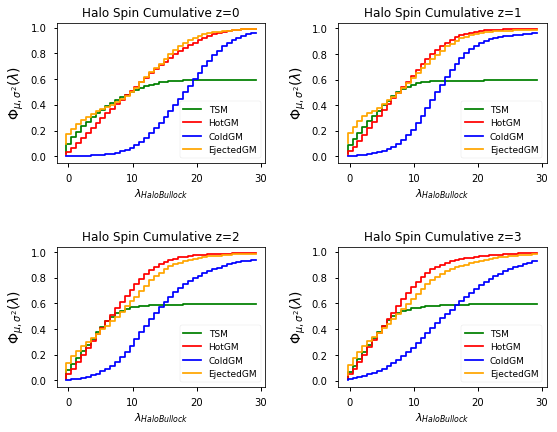

In [108]:
plt.figure(figsize=(10, 8))
fig = plt.figure(facecolor='white')

plt.subplot(221)
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z0_TSM10_11'], color='green', label='TSM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z0_HotGM10_11'], color='red', label='HotGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z0_ColdGM10_11'], color='blue', label='ColdGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z0_EjectedGM10_11'], color='orange', label='EjectedGM')

#plt.xlim(0, 6)
#plt.ylim(0,1)
#plt.legend(['$\mu_{cen}$ = 1.23, $\sigma_{cen}^2$ = 1.12','$\mu_{sat}$ = 1.04, $\sigma_{sat}^2$ = 0.88'], loc=4)
plt.xlabel('$\lambda_{Halo Bullock}$')
plt.ylabel('$\Phi_{\mu,\sigma^2}(\lambda)$', fontsize=14)
plt.title('Halo Spin Cumulative z=0')
plt.legend(loc=4, fontsize=9)


plt.subplot(222)
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z1_TSM10_11'], color='green', label='TSM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z1_HotGM10_11'], color='red', label='HotGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z1_ColdGM10_11'], color='blue', label='ColdGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z1_EjectedGM10_11'], color='orange', label='EjectedGM')

#plt.xlim(0, 6)
#plt.ylim(0,1)
#plt.legend(['$\mu_{cen}$ = 1.23, $\sigma_{cen}^2$ = 1.12','$\mu_{sat}$ = 1.04, $\sigma_{sat}^2$ = 0.88'], loc=4)
plt.xlabel('$\lambda_{Halo Bullock}$')
plt.ylabel('$\Phi_{\mu,\sigma^2}(\lambda)$', fontsize=14)
plt.title('Halo Spin Cumulative z=1')
plt.legend(loc=4, fontsize=9)


plt.subplot(223)
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z2_TSM10_11'], color='green', label='TSM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z2_HotGM10_11'], color='red', label='HotGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z2_ColdGM10_11'], color='blue', label='ColdGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z2_EjectedGM10_11'], color='orange', label='EjectedGM')

#plt.xlim(0, 6)
#plt.ylim(0,1)
#plt.legend(['$\mu_{cen}$ = 1.23, $\sigma_{cen}^2$ = 1.12','$\mu_{sat}$ = 1.04, $\sigma_{sat}^2$ = 0.88'], loc=4)
plt.xlabel('$\lambda_{Halo Bullock}$')
plt.ylabel('$\Phi_{\mu,\sigma^2}(\lambda)$', fontsize=14)
plt.title('Halo Spin Cumulative z=2')
plt.legend(loc=4, fontsize=9)



plt.subplot(224)
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z3_TSM10_11'], color='green', label='TSM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z3_HotGM10_11'], color='red', label='HotGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z3_ColdGM10_11'], color='blue', label='ColdGM')
plt.step(bins_cen, bulgedom_cen_DSage['DiskJcum_z3_EjectedGM10_11'], color='orange', label='EjectedGM')

#plt.xlim(0, 6)
#plt.ylim(0,1)
#plt.legend(['$\mu_{cen}$ = 1.23, $\sigma_{cen}^2$ = 1.12','$\mu_{sat}$ = 1.04, $\sigma_{sat}^2$ = 0.88'], loc=4)
plt.xlabel('$\lambda_{Halo Bullock}$')
plt.ylabel('$\Phi_{\mu,\sigma^2}(\lambda)$', fontsize=14)
plt.title('Halo Spin Cumulative z=3')
plt.legend(loc=4, fontsize=9)



plt.subplots_adjust(top=0.92, bottom=0.001, left=0.10, right=0.95, hspace=0.6,
                    wspace=0.35)
plt.style.use('seaborn-notebook')
#plt.savefig('Halospin_cumulative_DARKSAGE_difmassbins_z0toz3.png')
plt.show()


In [101]:
print bins_cen

[ -0.3      0.4575   1.215    1.9725   2.73     3.4875   4.245    5.0025
   5.76     6.5175   7.275    8.0325   8.79     9.5475  10.305   11.0625
  11.82    12.5775  13.335   14.0925  14.85    15.6075  16.365   17.1225
  17.88    18.6375  19.395   20.1525  20.91    21.6675  22.425   23.1825
  23.94    24.6975  25.455   26.2125  26.97    27.7275  28.485   29.2425]
